In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = r"C:\Users\GBTC408003ur\Documents\ImmersiveDataAnalytics\Week4\datasets\DC_Properties.csv"

DCHousing = pd.read_csv(filepath)
DCHousing.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
DCHousing.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
DCHousing.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [5]:
#remove the rows with empty values for the column 'PRICE'
DCHousing_no_missing = DCHousing[pd.notnull(DCHousing['PRICE'])]

In [6]:
DCHousing_no_missing.count()

Unnamed: 0            98216
BATHRM                98216
HF_BATHRM             98216
HEAT                  98216
AC                    98216
NUM_UNITS             57900
ROOMS                 98216
BEDRM                 98216
AYB                   98104
YR_RMDL               57674
EYB                   98216
STORIES               57867
SALEDATE              98215
PRICE                 98216
QUALIFIED             98216
SALE_NUM              98216
GBA                   57900
BLDG_NUM              98216
STYLE                 57900
STRUCT                57900
GRADE                 57900
CNDTN                 57900
EXTWALL               57900
ROOF                  57900
INTWALL               57900
KITCHENS              57899
FIREPLACES            98216
USECODE               98216
LANDAREA              98216
GIS_LAST_MOD_DTTM     98216
SOURCE                98216
CMPLX_NUM             40316
LIVING_GBA            40316
FULLADDRESS           57565
CITY                  57569
STATE               

In [7]:
DCHousing_no_missing['PRICE'].head()

0    1095000.0
2    2100000.0
3    1602000.0
5    1950000.0
7    1050000.0
Name: PRICE, dtype: float64

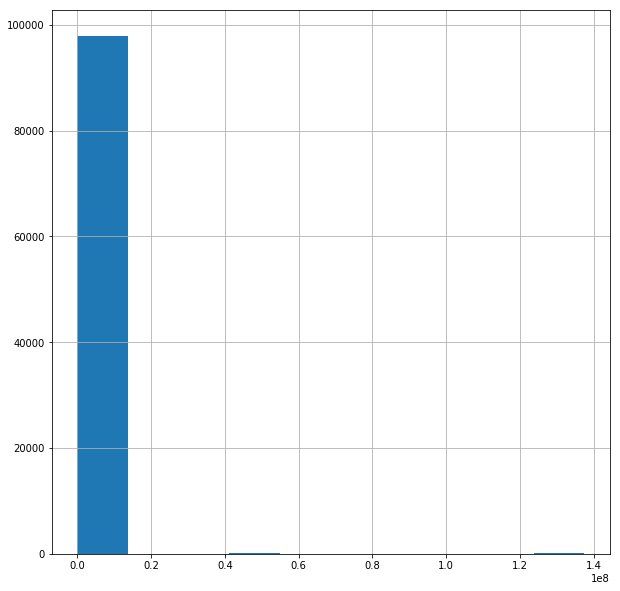

In [8]:
#plot the frequency count for 'PRICE'
DCHousing_no_missing['PRICE'].hist(figsize=(10,10))

In [9]:
#Z-SCORE Standardization

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'PRICE' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(DCHousing_no_missing[['PRICE']])

In [10]:
#mean and standard deviation of z-score standardized 'PRICE' column
price_zscore.mean(), price_zscore.std()

(-4.630074029551846e-18, 1.0)

In [11]:
price_zscore[:5]

array([[0.02317543],
       [0.16550072],
       [0.09497535],
       [0.14425814],
       [0.01680266]])

In [12]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
price_z_col = pd.Series(price_zscore.reshape(-1))

In [13]:
price_z_col[:5]

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64

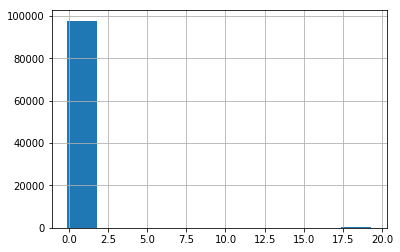

In [14]:
#AFTER: frequency count plot of 'PRICE' column (z-score standardization)
#range is much smaller
price_z_col.hist()

In [15]:
#Min-max Scaling

#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [16]:
#use MinMaxScaler function and fit_transform function on the 'PRICE' column
price_minmax = minmax_sc.fit_transform(DCHousing_no_missing[['PRICE']])      

In [17]:
#mean and standard deviation of Min-Max 'PRICE' column
price_minmax.mean(), price_minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [18]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
price_mm_col = pd.Series(price_minmax.reshape(-1))
price_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

In [19]:
#verify the range is between 0 and 1
price_mm_col.min(), price_mm_col.max()

(0.0, 0.9999999999999999)

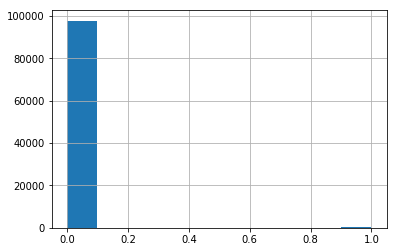

In [20]:
price_mm_col.hist()